## Description

To predict price of house in chennai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as msle

### Load the dataset

In [2]:
df = pd.read_csv('chennai_house_price_prediction.csv')
df.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [3]:
df.shape

(7109, 19)

### Data Exploration

In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace=True)

In [7]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [8]:
for i in range(0, len(df)):
    if pd.isnull(df.loc[i, 'N_BATHROOM'])==True:
        if (df.loc[i, 'N_BEDROOM'] == 1.0):
            df.loc[i, 'N_BATHROOM'] = 1.0
        else: 
            df.loc[i, 'N_BATHROOM'] = 2.0

In [9]:
def fill_na(x):
    return (x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3

In [10]:
df['QS_OVERALL'] = df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

In [11]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [12]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [13]:
df = df.astype({'N_BEDROOM':'int32', 'N_BATHROOM':'int32', 'N_ROOM':'int32'})

In [14]:
cols = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']

for x in cols:
    print(df[x].value_counts())
    print()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

1    5593
2    1516
Name: N_BATHROOM, dtype: int64

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

AllPub     1886
NoSeWa     1871
NoSewr     18

In [15]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [16]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [17]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [18]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'}, inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [19]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [20]:
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [21]:
df.drop(['PRT_ID'], axis=1, inplace=True)

In [22]:
df.shape

(7109, 18)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int32  
 4   N_BATHROOM     7109 non-null   int32  
 5   N_ROOM         7109 non-null   int32  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  COMMIS         7109 non-null   int64  
 17  SALES_PRICE    7109 non-null   int64  
dtypes: float

Text(0.5, 0, 'Sales price')

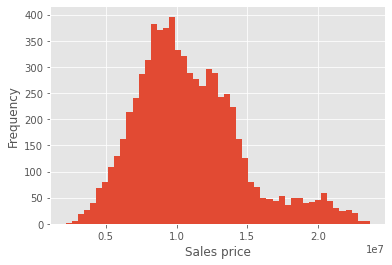

In [24]:
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel("Sales price")

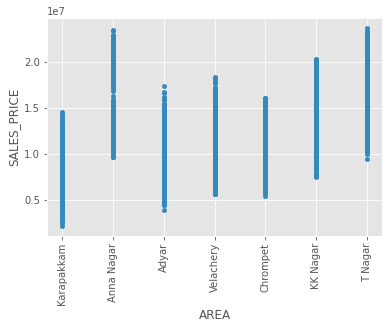

In [25]:
df.plot.scatter('AREA', 'SALES_PRICE')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='mean')

,SALES_PRICE
AREA,
Adyar,9.185668e+06
Anna Nagar,1.516820e+07
Chrompet,1.001381e+07
KK Nagar,1.269623e+07
Karapakkam,7.340100e+06
T Nagar,1.561674e+07
Velachery,1.104735e+07


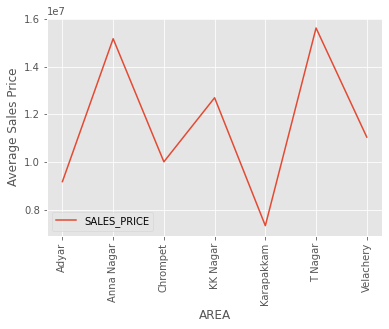

In [27]:
df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='mean').plot()
plt.xticks(rotation=90)
plt.ylabel("Average Sales Price")
plt.show()

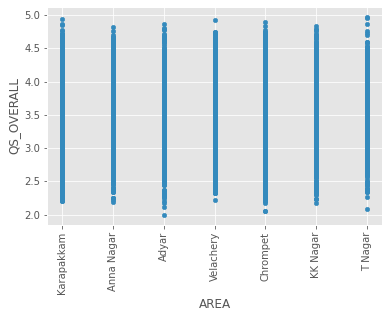

In [28]:
df.plot.scatter('AREA', 'QS_OVERALL')
plt.xticks(rotation=90)
plt.show()

In [29]:
df.pivot_table('SALES_PRICE', index=['AREA','PARK_FACIL'], columns='BUILDTYPE')

BUILDTYPE                Commercial         House        Others
AREA       PARK_FACIL                                          
Adyar      No          1.109649e+07  7.424247e+06  7.673436e+06
           Yes         1.196055e+07  8.449081e+06  8.770007e+06
Anna Nagar No          1.948272e+07  1.174120e+07  1.302749e+07
           Yes         2.038683e+07  1.303334e+07  1.394788e+07
Chrompet   No          1.187867e+07  8.095653e+06  8.676937e+06
           Yes         1.286339e+07  9.001546e+06  9.637036e+06
KK Nagar   No          1.543211e+07  1.024329e+07  1.108620e+07
           Yes         1.653037e+07  1.120019e+07  1.212296e+07
Karapakkam No          8.795977e+06  5.819565e+06  6.163488e+06
           Yes         9.579643e+06  6.739824e+06  7.269946e+06
T Nagar    No          1.944114e+07  1.202558e+07  1.314149e+07
           Yes         2.060118e+07  1.327155e+07  1.405953e+07
Velachery  No          1.359570e+07  8.500458e+06  9.297856e+06
           Yes         1.478889e+07  9.559725e+06  1.012912e+07

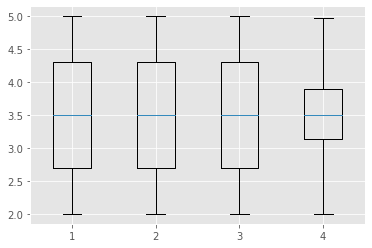

In [30]:
plt.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])
plt.show()

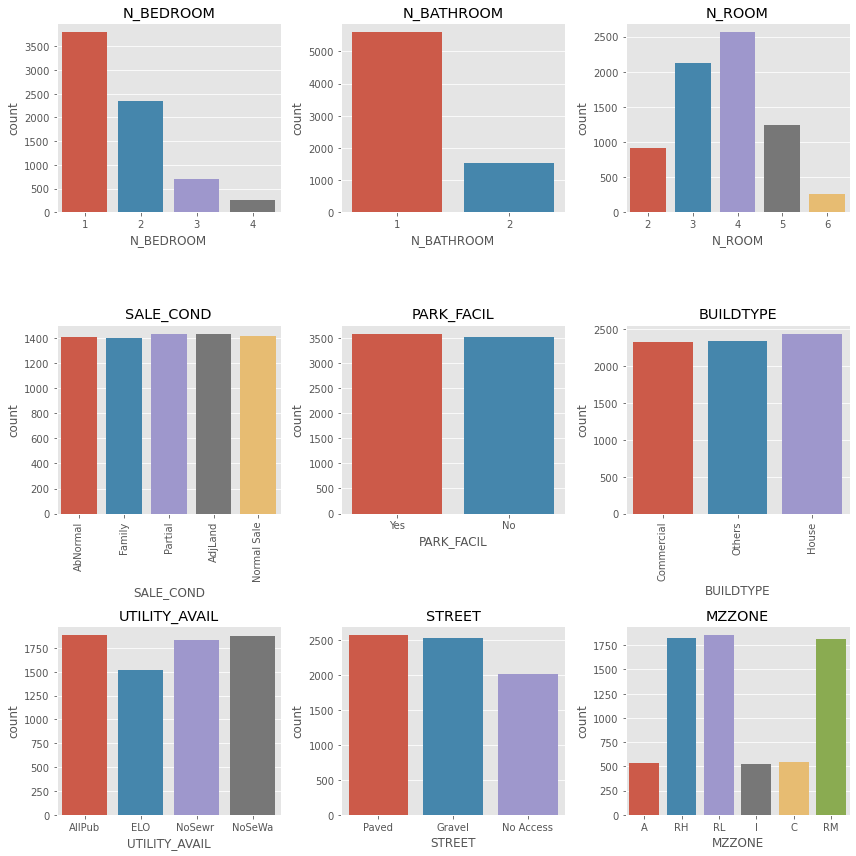

In [31]:
cols = ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c    # index to go through all the columns in cols
        ax = axs[r][c]    # show where to position each subplot
        sns.countplot(df[cols[i]], ax=ax)
        ax.set_title(cols[i])
        if cols[i] in ['SALE_COND','BUILDTYPE']:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
plt.tight_layout()

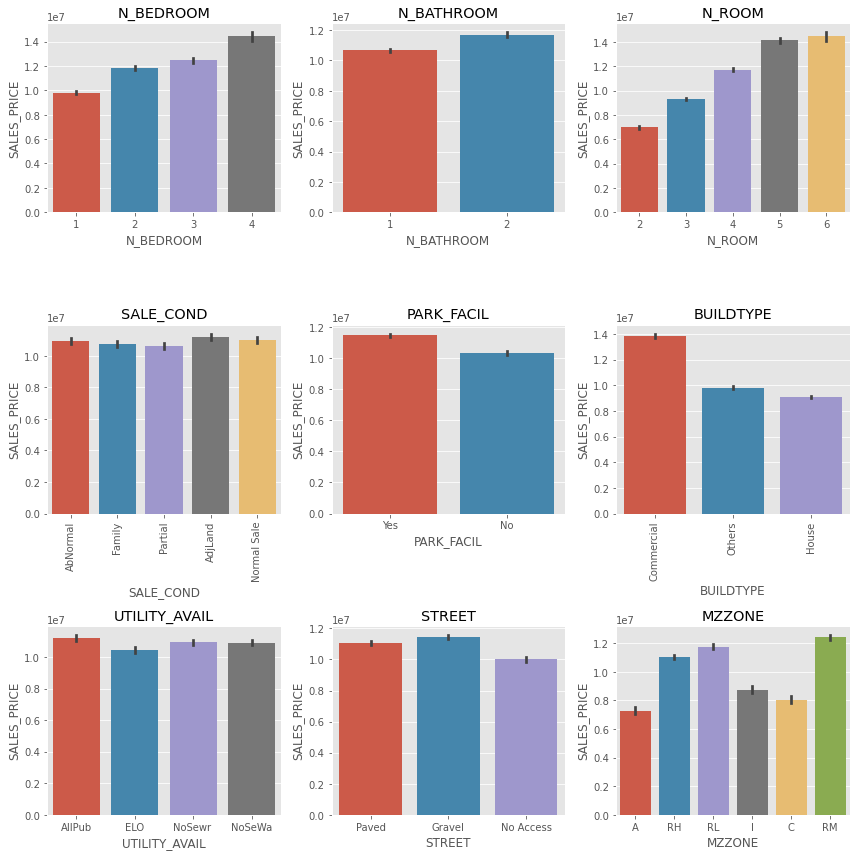

In [32]:
cols = ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c    # index to go through all the columns in cols
        ax = axs[r][c]    # show where to position each subplot
        sns.barplot(df[cols[i]], df['SALES_PRICE'], ax=ax)
        ax.set_title(cols[i])
        if cols[i] in ['SALE_COND','BUILDTYPE']:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
plt.tight_layout()

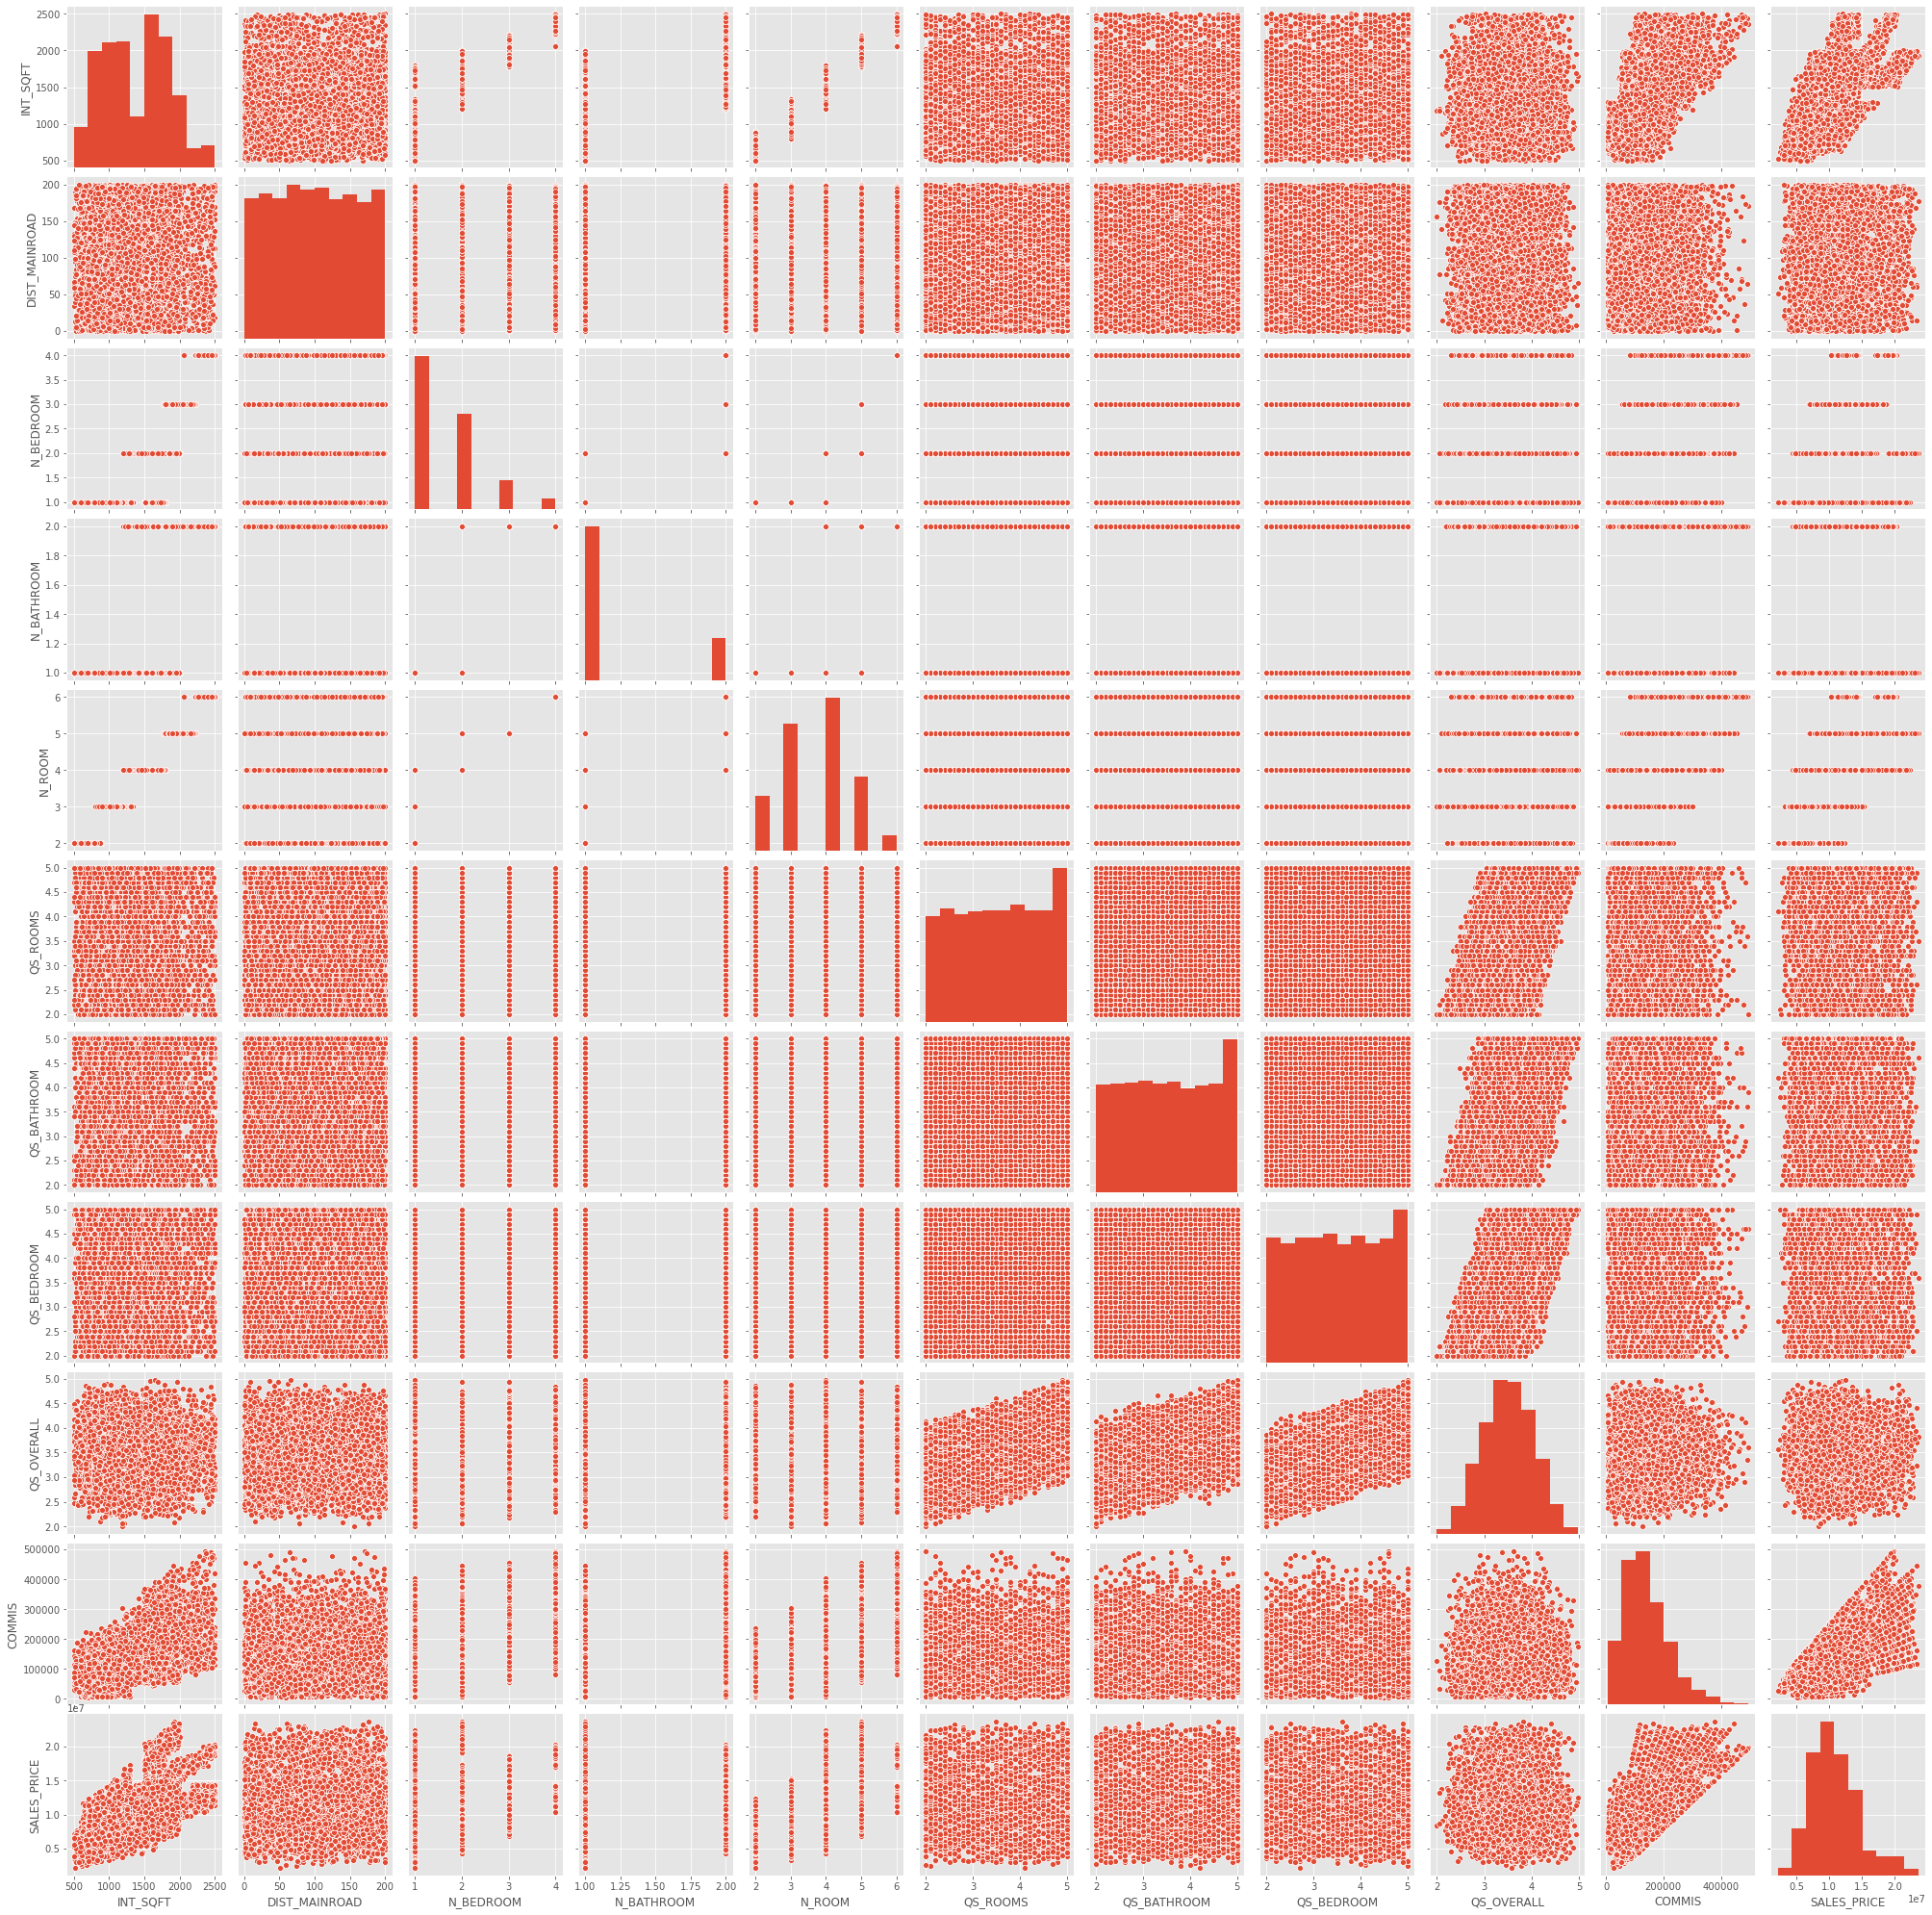

In [33]:
sns.pairplot(df)

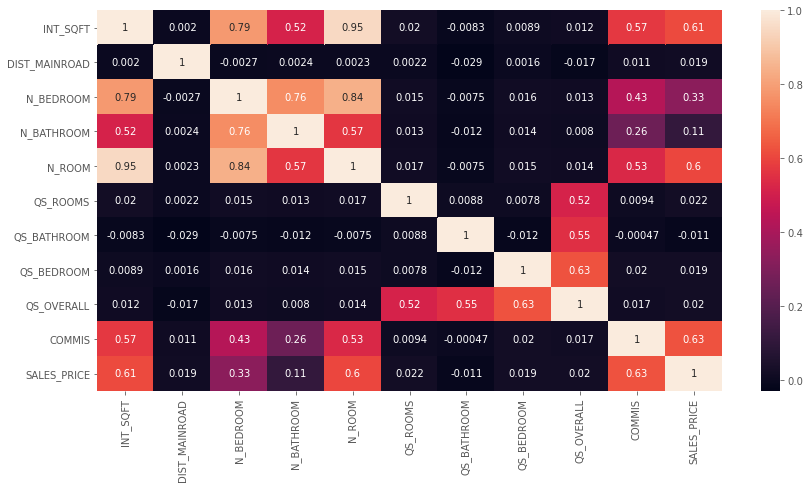

In [34]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

In [35]:
labelencoder = LabelEncoder()

df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:, 0].values)

df.iloc[:, 6] = labelencoder.fit_transform(df.iloc[:, 6].values)

df.iloc[:, 7] = labelencoder.fit_transform(df.iloc[:, 7].values)

df.iloc[:, 8] = labelencoder.fit_transform(df.iloc[:, 8].values)

df.iloc[:, 9] = labelencoder.fit_transform(df.iloc[:, 9].values)

df.iloc[:, 10] = labelencoder.fit_transform(df.iloc[:, 10].values)

df.iloc[:, 11] = labelencoder.fit_transform(df.iloc[:, 11].values)

In [36]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,4,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,144400,7600000
1,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,304049,21717770
2,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,92114,13159200
3,6,1855,14,3,2,5,2,0,2,3,2,2,4.7,3.9,3.6,4.010,77042,9630290
4,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,74063,7406250
5,2,1220,36,2,1,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,198316,12394750
6,2,1167,137,1,1,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,33955,8488790
7,6,1847,176,3,2,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,235204,16800250
8,2,771,175,1,1,2,1,0,2,3,2,5,2.9,3.7,4.0,3.550,33236,8308970
9,6,1635,74,2,1,4,0,0,2,1,1,2,3.1,3.1,3.3,3.160,121255,8083650


### Seggregate variables : Independent and Dependent 

In [37]:
x = df.drop(['SALES_PRICE'], axis=1)
y = df['SALES_PRICE']
x.shape, y.shape

((7109, 17), (7109,))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4976, 17), (2133, 17), (4976,), (2133,))

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
coef_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficients'])
coef_df

,Coefficients
AREA,-3.206625e+05
INT_SQFT,3.183571e+03
DIST_MAINROAD,4.665239e+02
N_BEDROOM,-1.449953e+06
N_BATHROOM,-1.233557e+06
N_ROOM,1.787385e+06
SALE_COND,-9.899304e+04
PARK_FACIL,9.874383e+05
BUILDTYPE,-1.774582e+06
UTILITY_AVAIL,-9.651514e+04


In [42]:
y_predict = reg.predict(x_test)

In [46]:
print("Mean Squared Log Error :", msle(y_test, y_predict))

Mean Squared Log Error : 0.030232951034288167


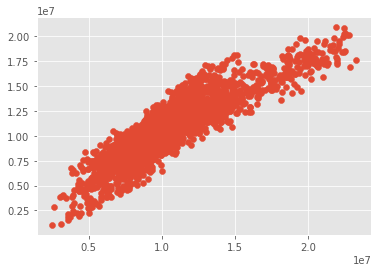

In [44]:
plt.scatter(y_test, y_predict)

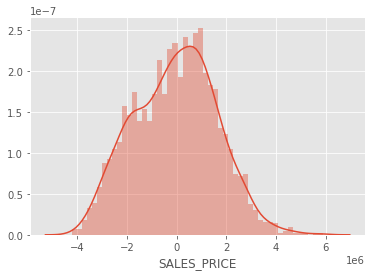

In [45]:
sns.distplot(y_test-y_predict, bins=50)